In [2]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()
# Get statistics on the dataset.
training_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


Defined the build_model and train_model functions.
Defined the plot_the_model and plot_the_loss_curve functions.
Epoch 1/30
567/567 [==============================] - 2s 2ms/step - loss: 145401.0156 - root_mean_squared_error: 381.3148
Epoch 2/30
567/567 [==============================] - 1s 2ms/step - loss: 27974.4395 - root_mean_squared_error: 167.2556
Epoch 3/30
567/567 [==============================] - 1s 2ms/step - loss: 27178.8945 - root_mean_squared_error: 164.8602
Epoch 4/30
567/567 [==============================] - 1s 2ms/step - loss: 26523.0156 - root_mean_squared_error: 162.8589
Epoch 5/30
567/567 [==============================] - 1s 2ms/step - loss: 25642.1973 - root_mean_squared_error: 160.1318
Epoch 6/30
567/567 [==============================] - 1s 2ms/step - loss: 25017.6895 - root_mean_squared_error: 158.1698
Epoch 7/30
567/567 [==============================] - 1s 2ms/step - loss: 24363.3418 - root_mean_squared_error: 156.0876
Epoch 8/30
567/567 [===================

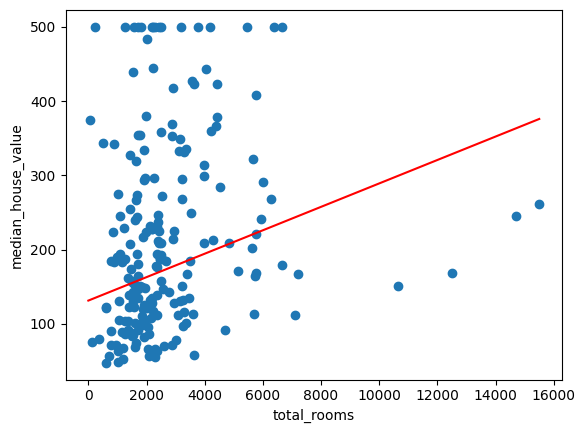

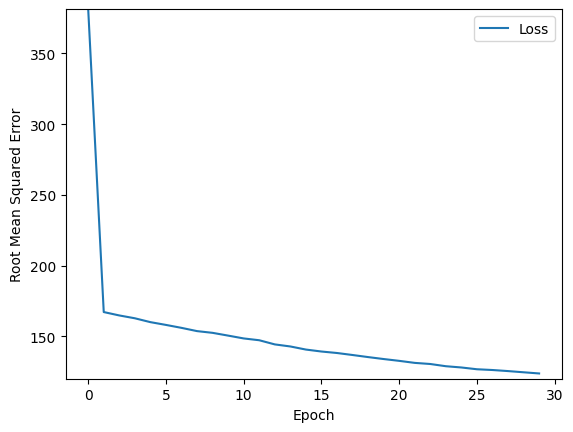

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             162
 3400     92             185
 3677     69             189
 2202     62             166
 2403     80             169
 5652    295             220
 3318    500             184
 2552    342             172
 1364    118             153
 3468    128             186


In [3]:

#@title Define the functions that build and train a model
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer.
    model.add(tf.keras.layers.Dense(units=1,
                                    input_shape=(1,)))

    # Compile the model topography into code that TensorFlow can efficiently
    # execute. Configure training to minimize the model's mean squared error.
    model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model


def train_model(model, df, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # Feed the model the feature and the label.
    # The model will train for the specified number of epochs.
    history = model.fit(x=df[feature],
                        y=df[label],
                        batch_size=batch_size,
                        epochs=epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the error for each epoch.
    hist = pd.DataFrame(history.history)

    # To track the progression of training, we're going to take a snapshot
    # of the model's root mean squared error at each epoch.
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against 200 random training examples."""

    # Label the axes.
    plt.xlabel(feature)
    plt.ylabel(label)

    # Create a scatter plot from 200 random points of the dataset.
    random_examples = training_df.sample(n=200)
    plt.scatter(random_examples[feature], random_examples[label])

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = random_examples[feature].max()
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1[0]], c='r')

    # Render the scatter plot and the red line.
    plt.show()


def plot_the_loss_curve(epochs, rmse):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")
def predict_house_values(n, feature, label):
    """Predict house values based on a feature."""

    batch = training_df[feature][10000:10000 + n]
    predicted_values = my_model.predict_on_batch(x=batch)

    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    print("--------------------------------------")
    for i in range(n):
        print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                       training_df[label][10000 + i],
                                       predicted_values[i][0] ))

# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based
# solely on total_rooms.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)